<a href="https://colab.research.google.com/github/justbeingdk/PRODIGY_DS_04/blob/main/Prodigy_DS_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import warnings
warnings.filterwarnings('ignore')

In [12]:
dt = pd.read_csv('twitter_training[1].csv',names=['ID', 'Topic', 'Sentiment', 'Tweet'], header=None)
dt.head(10)

,ID,Topic,Sentiment,Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
5,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
6,2402,Borderlands,Positive,So I spent a few hours making something for fu...
7,2402,Borderlands,Positive,So I spent a couple of hours doing something f...
8,2402,Borderlands,Positive,So I spent a few hours doing something for fun...
9,2402,Borderlands,Positive,So I spent a few hours making something for fu...


In [13]:
dt.tail(10)

,ID,Topic,Sentiment,Tweet
60945,4846,GrandTheftAuto(GTA),Positive,The best gta session anybody had ever in this ...
60946,4846,GrandTheftAuto(GTA),Positive,The third best gta session I ’ ve had ever in ...
60947,4846,GrandTheftAuto(GTA),Positive,The hardest gta session you had ever in The hi...
60948,4847,GrandTheftAuto(GTA),Irrelevant,Whoever is vandalizing the speed cameras aroun...
60949,4847,GrandTheftAuto(GTA),Irrelevant,Whoever wreaks havoc on the speed cameras arou...
60950,4847,GrandTheftAuto(GTA),Irrelevant,Whoever vandalizing the speed cameras around t...
60951,4847,GrandTheftAuto(GTA),Irrelevant,Whoever is vandalizing the speed cameras aroun...
60952,4847,GrandTheftAuto(GTA),Irrelevant,OH Whoever is vandalizing the video speed came...
60953,4847,GrandTheftAuto(GTA),Irrelevant,Whoever is mounting the speed cameras around f...
60954,4848,GrandTheftAuto(GTA),Irrelevant,The first one looks like the shit you see in h...


In [14]:
dt.columns

Index(['ID', 'Topic', 'Sentiment', 'Tweet'], dtype='object')

In [15]:
dt.index

RangeIndex(start=0, stop=60955, step=1)

In [16]:
dt.shape

(60955, 4)

In [17]:
dt.size

243820

In [18]:
dt.describe()

,ID
count,60955.000000
mean,6231.547043
std,3953.820926
min,1.000000
25%,2608.000000
50%,5990.000000
75%,9793.000000
max,13200.000000


In [19]:
dt.isna().sum()

ID             0
Topic          0
Sentiment      0
Tweet        554
dtype: int64

In [20]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60955 entries, 0 to 60954
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         60955 non-null  int64 
 1   Topic      60955 non-null  object
 2   Sentiment  60955 non-null  object
 3   Tweet      60401 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.9+ MB


In [21]:

def analyze_sentiment(text):
    if isinstance(text, str):
        return TextBlob(text).sentiment.polarity
    else:
        return 0.0

In [22]:
# Perform sentiment analysis
dt['Polarity'] = dt['Tweet'].apply(analyze_sentiment)

# Categorize sentiment
dt['Sentiment_Label'] = dt['Polarity'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')

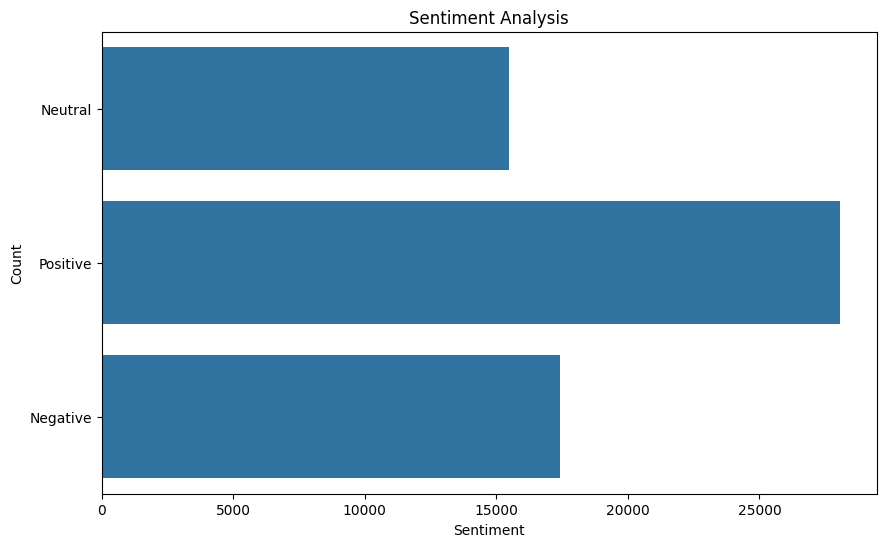

In [23]:
# Analyze sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(dt['Sentiment_Label'])
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

<Figure size 1500x800 with 0 Axes>

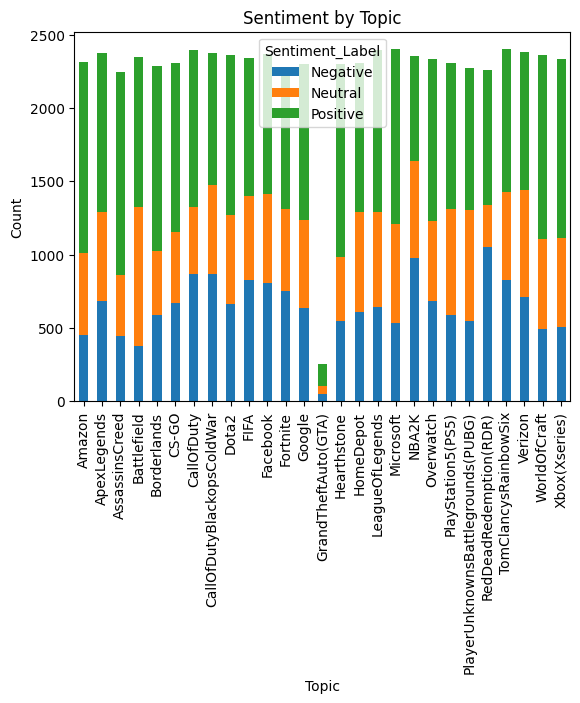

In [24]:
# Analyze sentiment by topic
plt.figure(figsize=(15,8))
sentiment_by_topic = dt.groupby(['Topic', 'Sentiment_Label']).size().unstack(fill_value=0)
sentiment_by_topic.plot(kind='bar', stacked=True)
plt.title('Sentiment by Topic')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.show()

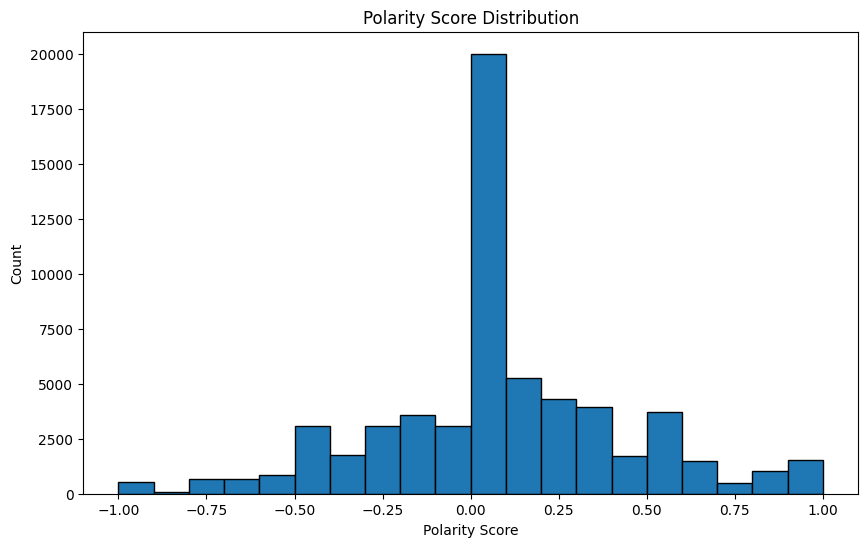

In [25]:
plt.figure(figsize=(10, 6))
plt.hist(dt['Polarity'], bins=20, edgecolor='k')
plt.title('Polarity Score Distribution')
plt.xlabel('Polarity Score')
plt.ylabel('Count')
plt.show()

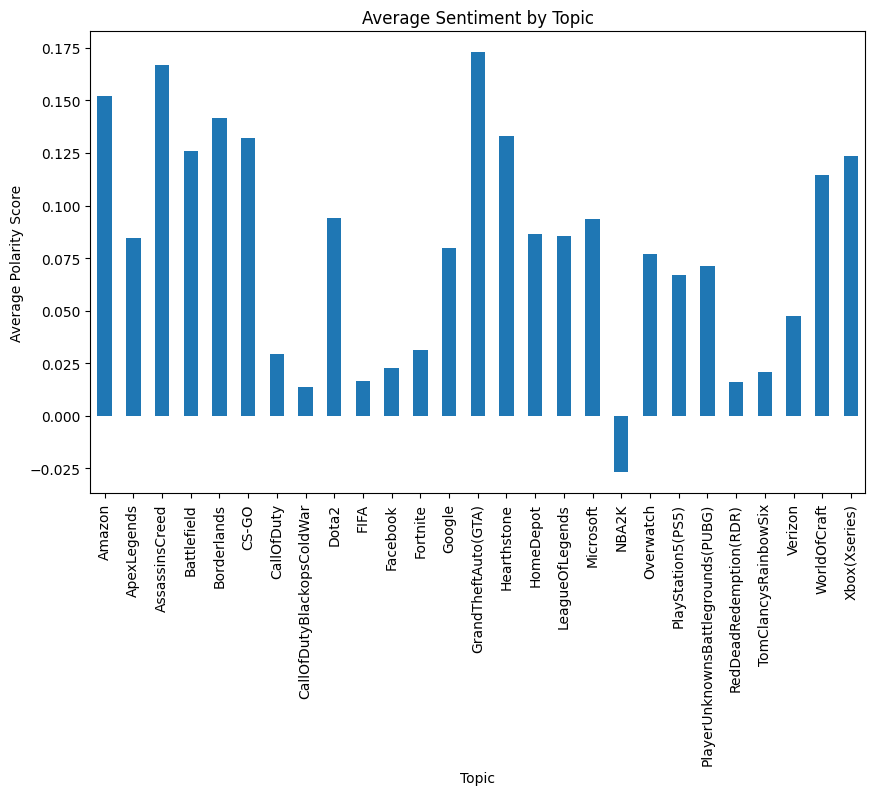

In [26]:
plt.figure(figsize=(10, 6))
average_polarity_by_topic = dt.groupby('Topic')['Polarity'].mean()
average_polarity_by_topic.plot(kind='bar')
plt.title('Average Sentiment by Topic')
plt.xlabel('Topic')
plt.ylabel('Average Polarity Score')
plt.show()

In [27]:
# Visualize the most positive and negative tweets
most_positive_tweet = dt[dt['Polarity'] == dt['Polarity'].max()]['Tweet'].values[0]
most_negative_tweet = dt[dt['Polarity'] == dt['Polarity'].min()]['Tweet'].values[0]

print('Most Positive Tweet:')
print(most_positive_tweet)

print('\nMost Negative Tweet:')
print(most_negative_tweet)

Most Positive Tweet:
Platinum is the best loot @Borderlands  

Most Negative Tweet:
"What terrible bitch!"
